<a href="https://colab.research.google.com/github/razerspeed/image_recommendation_task/blob/main/faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [2]:
import torchvision
import torch
import PIL
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
from torchvision.transforms.functional import convert_image_dtype
from PIL import Image, ImageDraw, ImageFont, ImageColor

In [4]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# **Importing Model**

Loading pretrained Faster RCNN model trained on COCO dataset

In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [5]:
!wget https://thumbs.dreamstime.com/z/may-berlin-germany-aerial-view-city-street-cars-traffic-light-transportation-auto-berlin-concept-may-berlin-174039277.jpg

--2021-09-12 17:03:08--  https://thumbs.dreamstime.com/z/may-berlin-germany-aerial-view-city-street-cars-traffic-light-transportation-auto-berlin-concept-may-berlin-174039277.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 431416 (421K) [image/jpeg]
Saving to: ‘may-berlin-germany-aerial-view-city-street-cars-traffic-light-transportation-auto-berlin-concept-may-berlin-174039277.jpg’

may-berlin-germany- 100%[===================>] 421.30K  --.-KB/s    in 0.02s   

2021-09-12 17:03:08 (16.7 MB/s) - ‘may-berlin-germany-aerial-view-city-street-cars-traffic-light-transportation-auto-berlin-concept-may-berlin-174039277.jpg’ saved [431416/431416]



In [6]:
img=PIL.Image.open("may-berlin-germany-aerial-view-city-street-cars-traffic-light-transportation-auto-berlin-concept-may-berlin-174039277.jpg")

In [7]:
transform_test = transforms.Compose([
    
    transforms.Resize((512,512)), 
    transforms.ToTensor()
    
])

In [8]:
img1=transform_test(img)

# **Testing Model**

In [10]:
model.eval()
predictions = model(img1.unsqueeze(0))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [11]:
threshold=.8
import cv2
#boxes (Tensor): Tensor of size (N, 4) containing bounding boxes in (xmin, ymin, xmax, ymax) format
img2=F.to_pil_image(img1)
draw=ImageDraw.Draw(img2)
count_label=[]
for i in range(len(predictions[0]['labels'])):
  if predictions[0]['scores'][i] > threshold:
    boxes= predictions[0]['boxes'][i]
    img_boxes = boxes.to(torch.int64).tolist()
    draw.rectangle(img_boxes, width=4,outline ="red")
    label=COCO_INSTANCE_CATEGORY_NAMES[predictions[0]['labels'][i]]
    draw.text((img_boxes[0],img_boxes[1]),label)
    count_label.append(label)
  # break

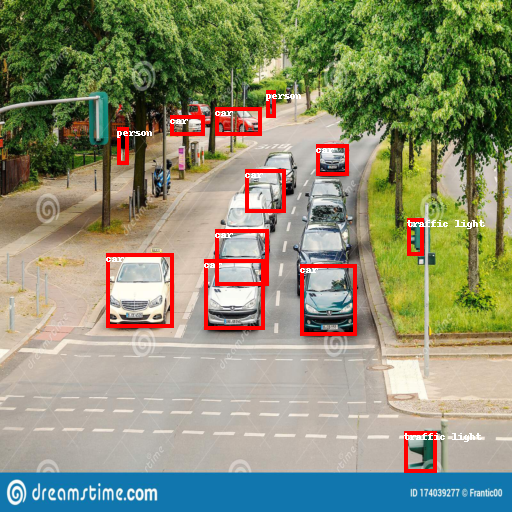

In [12]:
img2

In [13]:
(unique, counts)=np.unique(count_label,return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [14]:
frequencies

array([['car', '8'],
       ['person', '2'],
       ['traffic light', '2']], dtype='<U21')